In [144]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# For the stuckness summary by learner data 
# The current dataset being pulled is a subset who exhibited learning behavior 
# Out of the  total learners who worked on more than 1 exercise, 
# about 82% exhibited some signs of learning,
# where an exercise had both correct and incorrect responses. Out of the 18%  remaining sessions,  
# 15% mastered some exercises immediately and 12% never got unstuck out of some exercises. 
# Only 5% mastered all their exercises and 2% were stuck on all their exercises. 

stuck = pd.read_csv('~/cahl_output/summarize_stuckness_bylearner_problemtype.csv')


In [145]:
stuck.head()

,sha_id,total_problems,never_stuck_problems,never_unstuck_problems,unstuck_problems,unstuck_same_exercise,unstuck_remediation_problems,unstuck_correct_remdiation_problems,unstuck_prereq_avail_problems,unstuck_is_prereq_match_problems
0,sha_id,0,0,0,0,0,0,0,0,0
1,0001R22gGbvLqg5+mSbv7kpiOjFTLE7eddHYSfaqMA8=,1,1,0,0,0,0,0,0,0
2,0002PRyVGO/PD9Tj3S7W79JCi0otKMSfCI3RGFv0GJo=,8,4,4,0,0,0,0,0,0
3,0005vOGB8+M9AXMwj/abTgxySeBzy2cazO6p1H8C/VM=,2,2,0,0,0,0,0,0,0
4,00068D7jsV0viktfuth2oNk8P8nSh04m70ODvozWAH0=,5,5,0,0,0,0,0,0,0


In [150]:
# Find stats for those who exhibited learning: i.e.,
# How many learners never get stuck
# How many learner 
# How many learners ever get stuck?



output_metrics = {
    '01-total learners ':{
            'total learners': stuck['sha_id'].count(),
            'total problems': '-'
            },
    '02-tried a problems':{
            'total learners': sum(stuck['total_problems']>0),
            'total problems': stuck['total_problems'].sum()
            },
    '03-immediately mastered a problem ':{
            'total learners': sum(stuck['never_stuck_problems']>0),
            'total problems': stuck['never_stuck_problems'].sum() 
            },
    '04-got stuck ever':{
            'total learners': sum((stuck['never_unstuck_problems']>0)|(stuck['unstuck_problems']>0)),
            'total problems': stuck['never_unstuck_problems'].sum() + stuck['unstuck_problems'].sum() 
            },
    '05-unable to unstuck':{
            'total learners': sum(stuck['never_unstuck_problems']>0),
            'total problems':  stuck['never_unstuck_problems'].sum()
            },
    '06-able to unstuck':{
            'total learners':sum(stuck['unstuck_problems']>0),
            'total problems': stuck['unstuck_problems'].sum()
            },    
    '07-unstuck exercise have prereq available':{
            'total learners':sum(stuck['unstuck_prereq_avail_problems']>0),
            'total problems': stuck['unstuck_prereq_avail_problems'].sum()
            },   
    '08-prereq for unstuck exercise matches prereq':{
            'total learners':sum(stuck['unstuck_is_prereq_match_problems']>0),
            'total problems': stuck['unstuck_is_prereq_match_problems'].sum()
            },
    '09-unstuck remediation problems for unstuck exercise':{
            'total learners':sum(stuck['unstuck_remediation_problems']>0),
            'total problems': stuck['unstuck_remediation_problems'].sum()
            },      
    '10-unstuck remediation problems same exercise as stuck exercise':{
            'total learners':sum(stuck['unstuck_same_exercise']>0),
            'total problems': stuck['unstuck_same_exercise'].sum()
            },      
    '11-unstuck remediation problems answered correctly':{
            'total learners':sum(stuck['unstuck_correct_remdiation_problems']>0),
            'total problems': stuck['unstuck_correct_remdiation_problems'].sum()
            }    

}

output = pd.DataFrame(columns = ['metric','total learners','total problems'])

for metric in sorted(output_metrics.keys()):
    output = output.append({'metric': metric,
                           'total learners': output_metrics[metric]['total learners'],
                           'total problems': output_metrics[metric]['total problems']},
                          ignore_index = True)

print('Summary of Metrics:')
print(output)
output.to_csv('summary_of_metrics.csv')
# stored here
# https://docs.google.com/spreadsheets/d/12qtEK-M36oz_ZLam6KveuWQniH6YYoZkOiqA17x3tqA/edit#gid=0

Summary of Metrics:
                                               metric total learners  \
0                                  01-total learners         5850161   
1                                 02-tried a problems        5726004   
2                  03-immediately mastered a problem         5162593   
3                                   04-got stuck ever        5039549   
4                                05-unable to unstuck        4528457   
5                                  06-able to unstuck        3238783   
6           07-unstuck exercise have prereq available        3142214   
7       08-prereq for unstuck exercise matches prereq        1110778   
8   09-unstuck remediation problems for unstuck ex...        3061402   
9   10-unstuck remediation problems same exercise ...        3030926   
10  11-unstuck remediation problems answered corre...        2951244   

   total problems  
0               -  
1       128825485  
2        82098342  
3        46727143  
4        277504

Histogram of Perc Stuck Problems Out of Total Problems:


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


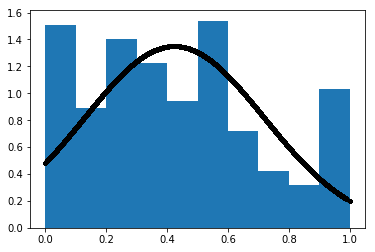

In [147]:
# distribution of stuck problems 
print('Histogram of Perc Stuck Problems Out of Total Problems:')
stuck_with_problems = stuck[stuck['total_problems']>0]
perc_stuck =(stuck_with_problems['never_unstuck_problems'] +
               stuck_with_problems['unstuck_problems'])/stuck_with_problems['total_problems']
stuck_norm_fit = stats.norm.pdf( perc_stuck, np.mean(perc_stuck), np.std(perc_stuck))
plt.plot(perc_stuck, stuck_norm_fit,'.', color = 'black')
plt.hist(perc_stuck, normed=True)
plt.show()


Histogram of Perc Unstuck Problems Out of Total Stuck:


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


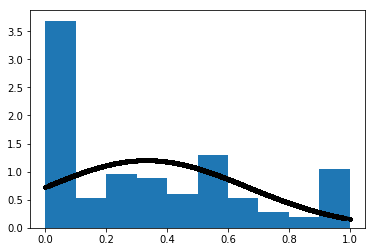

In [148]:
plt.close()
print('Histogram of Perc Unstuck Problems Out of Total Stuck:')
unstuck_with_problems = stuck[(stuck['never_unstuck_problems']>0) |
                           (stuck['unstuck_problems']>0)]
perc_unstuck = unstuck_with_problems['unstuck_problems']/(unstuck_with_problems['never_unstuck_problems'] +
                           unstuck_with_problems['unstuck_problems'])

unstuck_norm_fit = stats.norm.pdf( perc_unstuck, np.mean(perc_unstuck), np.std(perc_unstuck))
plt.plot(perc_unstuck, unstuck_norm_fit,'.', color = 'black')
plt.hist(perc_unstuck, normed=True)
plt.show()